$\textbf{PROGRAMMING #1 ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu

Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).m scratch).

## Assignment 1
Name: Sheena Stella Salde <br>
Dataset: Wine (https://archive.ics.uci.edu/dataset/109/wine) <br>

In [1]:
%%capture
!pip install fitter

### Importing Libraries and Loading the Dataset

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
import numpy as np  # Ensure numpy is imported
from scipy import stats

# Load dataset and assign column names for readability
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
df = pd.read_csv(url, names=columns)

### Computing and Printing Summary Statistics

In [3]:
# Compute summary statistics
summary_stats = df.describe().T  # Transpose for easier readability
summary_stats.insert(0, 'Variable', summary_stats.index)  # Insert the variable names as the first column

print("Summary Statistics for Each Column:")
print(summary_stats)

Summary Statistics for Each Column:
                                                  Variable  count        mean  \
Class                                                Class  178.0    1.938202   
Alcohol                                            Alcohol  178.0   13.000618   
Malic acid                                      Malic acid  178.0    2.336348   
Ash                                                    Ash  178.0    2.366517   
Alcalinity of ash                        Alcalinity of ash  178.0   19.494944   
Magnesium                                        Magnesium  178.0   99.741573   
Total phenols                                Total phenols  178.0    2.295112   
Flavanoids                                      Flavanoids  178.0    2.029270   
Nonflavanoid phenols                  Nonflavanoid phenols  178.0    0.361854   
Proanthocyanins                            Proanthocyanins  178.0    1.590899   
Color intensity                            Color intensity  178.0    5.05

### Computing the Correlation Matrix

In [4]:
# Compute the correlation matrix
corr = df.corr()

### Creating and Displaying the Heatmap

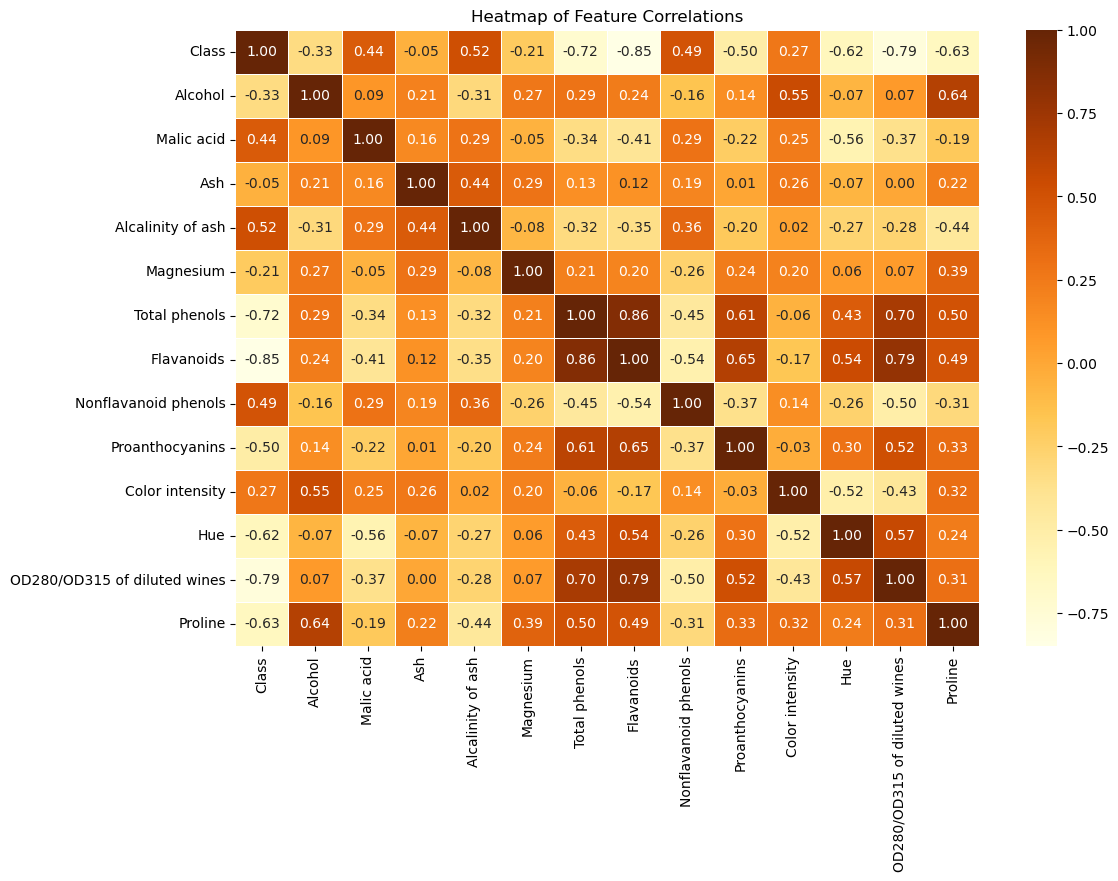

In [5]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


### Hypothesis Test

In [6]:
# Extract data for two classes
class1 = df[df['Class'] == 1]['Alcohol']
class2 = df[df['Class'] == 2]['Alcohol']

# Calculate sample means
mean_class1 = np.mean(class1)
mean_class2 = np.mean(class2)

# Calculate sample standard deviations
std_class1 = np.std(class1, ddof=1)
std_class2 = np.std(class2, ddof=1)

# Calculate sample sizes
n_class1 = len(class1)
n_class2 = len(class2)

# Calculate the standard error of the difference in means
se_diff = np.sqrt((std_class1**2 / n_class1) + (std_class2**2 / n_class2))

# Calculate the t-statistic
t_stat = (mean_class1 - mean_class2) / se_diff

# Degrees of freedom
degrees_freedom = n_class1 + n_class2 - 2

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), degrees_freedom))

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')


T-statistic: 16.7113
P-value: 0.0000


#### Conclusion
Based on the provided T-statistic (16.7113) and p-value (0.0000), we can conclude that there is a statistically significant difference in alcohol content between Class 1 and Class 2 wines. The very low p-value (less than 0.05, commonly accepted significance level) suggests that the observed difference is unlikely due to random chance. In other words, there is strong evidence to reject the null hypothesis, which typically states that there's no difference between the means of the two classes.

Therefore, we can be confident that the alcohol content in Class 1 and Class 2 wines is statistically distinct.